<a href="https://colab.research.google.com/github/parneetsingh022/tensorflow-deep-learning/blob/main/03_tensorflow_classification_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as  pd

# Working a larger example (multiclass classification)

When we have more than two classes as an option, it's known as *multi-class classification*.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0].shape

(28, 28)

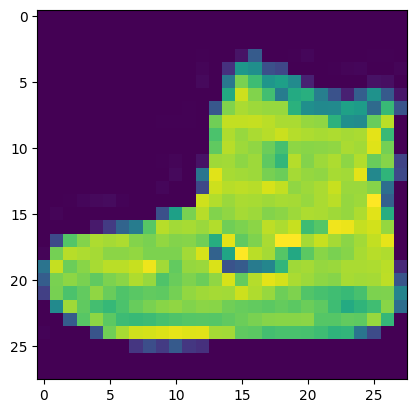

In [ ]:
plt.imshow(train_data[0])

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

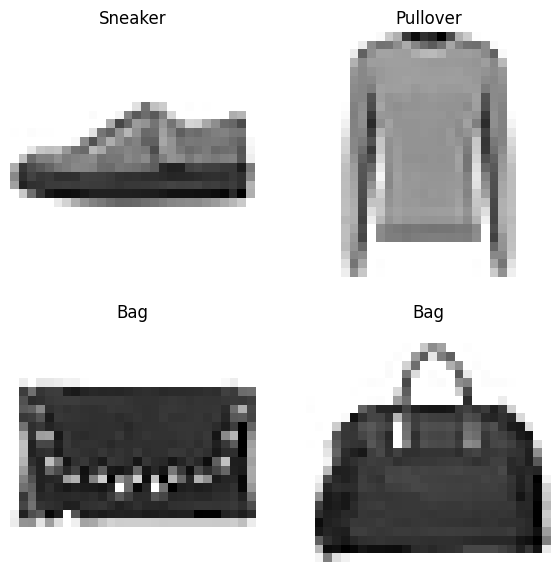

In [ ]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For multi-class classification model, we an use a similar architecture to our binary classifieres, however, we're going to have to tweak a few things:
* Input shape = 28 X 28 ( the sape of one image )
* Output shape 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form SparceCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# building a model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8073 - accuracy: 0.7213 - val_loss: 0.7224 - val_accuracy: 0.7656
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6621 - accuracy: 0.7742 - val_loss: 0.6460 - val_accuracy: 0.8060
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6124 - accuracy: 0.7939 - val_loss: 0.7169 - val_accuracy: 0.7640
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5737 - accuracy: 0.8062 - val_loss: 0.6387 - val_accuracy: 0.7964
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5435 - accuracy: 0.8157 - val_loss: 0.5879 - val_accuracy: 0.7898
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5018 - accuracy: 0.8261 - val_loss: 0.6095 - val_accuracy: 0.7800
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4679 - accuracy: 0.8368 - val_loss: 0.5194 - val_accuracy

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

# Normalization
Neural networks prefer data to be scaled (or normalized), this means they like to have the number in the tensors they try to find patterns between 0 and 1

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()

# check the min and max value of scalled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# building a model
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

norm_history = model2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4923 - accuracy: 0.8250 - val_loss: 0.4209 - val_accuracy: 0.8467
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3669 - accuracy: 0.8649 - val_loss: 0.4539 - val_accuracy: 0.8436
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3300 - accuracy: 0.8780 - val_loss: 0.3883 - val_accuracy: 0.8603
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3080 - accuracy: 0.8863 - val_loss: 0.3757 - val_accuracy: 0.8648
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2913 - accuracy: 0.8917 - val_loss: 0.3627 - val_accuracy: 0.8675
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2746 - accuracy: 0.8967 - val_loss: 0.3613 - val_accuracy: 0.8689
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2654 - accuracy: 0.9010 - val_loss: 0.3626 - val_accuracy:

> 🔑 Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

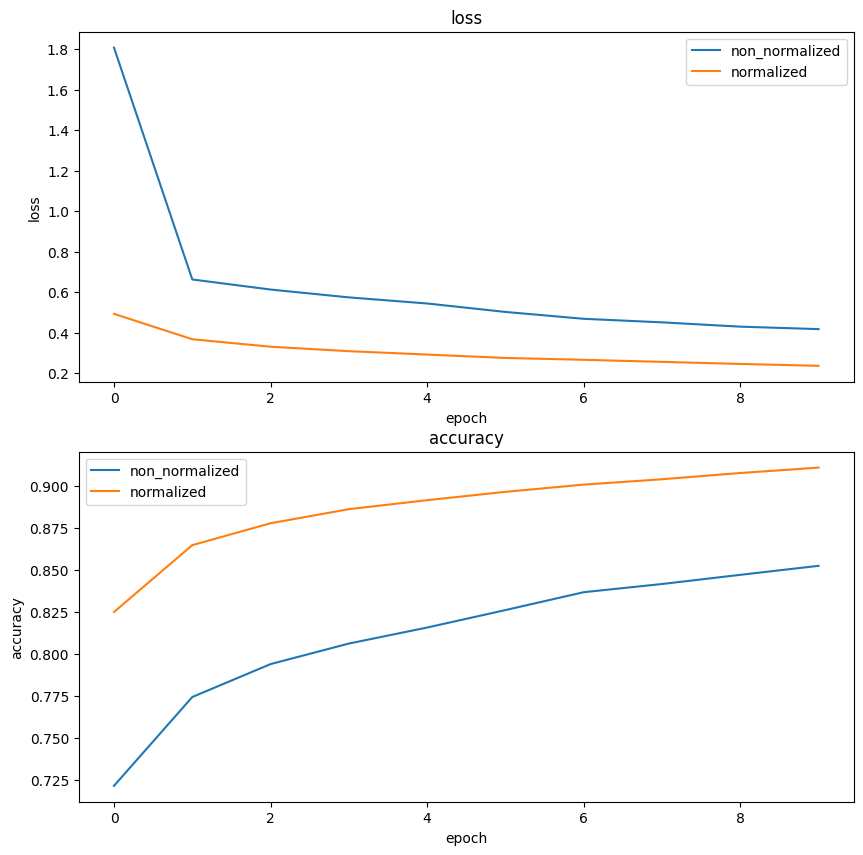

In [ ]:
# prompt: plot both non_norm_history and norm_history in plt subplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("loss")
plt.plot(non_norm_history.history['loss'], label='non_normalized')
plt.plot(norm_history.history['loss'], label='normalized')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()


plt.subplot(2,1,2)
plt.title("accuracy")
plt.plot(non_norm_history.history['accuracy'], label='non_normalized')
plt.plot(norm_history.history['accuracy'], label='normalized')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [ ]:
# building a model
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm,test_labels), callbacks=[lr_schedular])


Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4862 - accuracy: 0.8253 - val_loss: 0.4070 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3685 - accuracy: 0.8655 - val_loss: 0.4525 - val_accuracy: 0.8472 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8747 - val_loss: 0.3829 - val_accuracy: 0.8603 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3213 - accuracy: 0.8826 - val_loss: 0.3858 - val_accuracy: 0.8607 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3084 - accuracy: 0.8853 - val_loss: 0.3809 - val_accuracy: 0.8642 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3014 - accuracy: 0.8881 - val_loss: 0.3818 - val_accuracy: 0.8646 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding ideal learning rate')

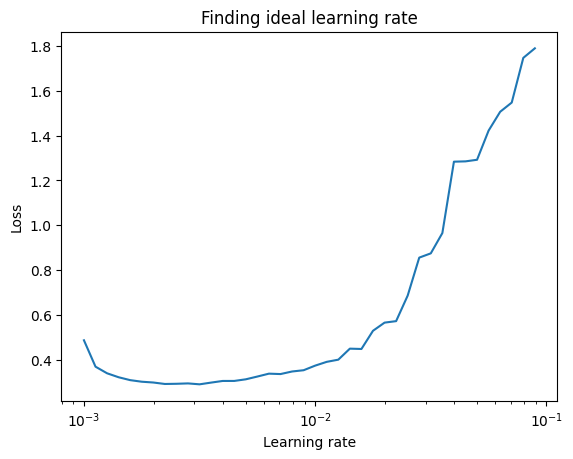

In [ ]:
# Plot learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

I looks like the ideal learning rate is around $10^{-3}$ or 0.001 which looks like is the learning rate we're already using

In [ ]:
# plotting confusion metrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_metrix(y_test,y_preds,classes=None, figsize=(10,10), text_size=15):

  # create confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np. newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # Set the threshhold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [ ]:
y_probs = model2.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.72859700e-08, 3.29748534e-10, 9.03269815e-09, 6.13336315e-09,
        3.07048303e-10, 3.64434789e-03, 9.49874632e-08, 4.33392404e-03,
        1.02753986e-10, 9.92021561e-01],
       [1.09963439e-05, 9.03448486e-13, 9.99591887e-01, 3.87696559e-08,
        3.51108320e-04, 3.25345652e-15, 4.59751463e-05, 7.00616933e-18,
        1.46109010e-11, 1.20539300e-15],
       [4.07107237e-10, 9.99999940e-01, 2.43070216e-14, 1.63046229e-10,
        2.19924261e-14, 8.31007067e-18, 3.35759719e-11, 3.74300300e-24,
        1.89763112e-14, 1.37213895e-17],
       [3.40653528e-09, 9.99999940e-01, 1.14964583e-11, 2.17790586e-08,
        2.00702111e-11, 9.88813345e-16, 4.00094669e-09, 6.91840505e-22,
        3.13438837e-13, 9.37647897e-16],
       [2.65861660e-01, 5.97717474e-07, 1.18646715e-02, 1.09888031e-03,
        2.37338105e-03, 1.59014171e-08, 7.18792260e-01, 4.48566934e-10,
        8.48395575e-06, 1.71266235e-09]], dtype=float32)

In [ ]:
# Convert all of the prediction probabilities into integers

y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

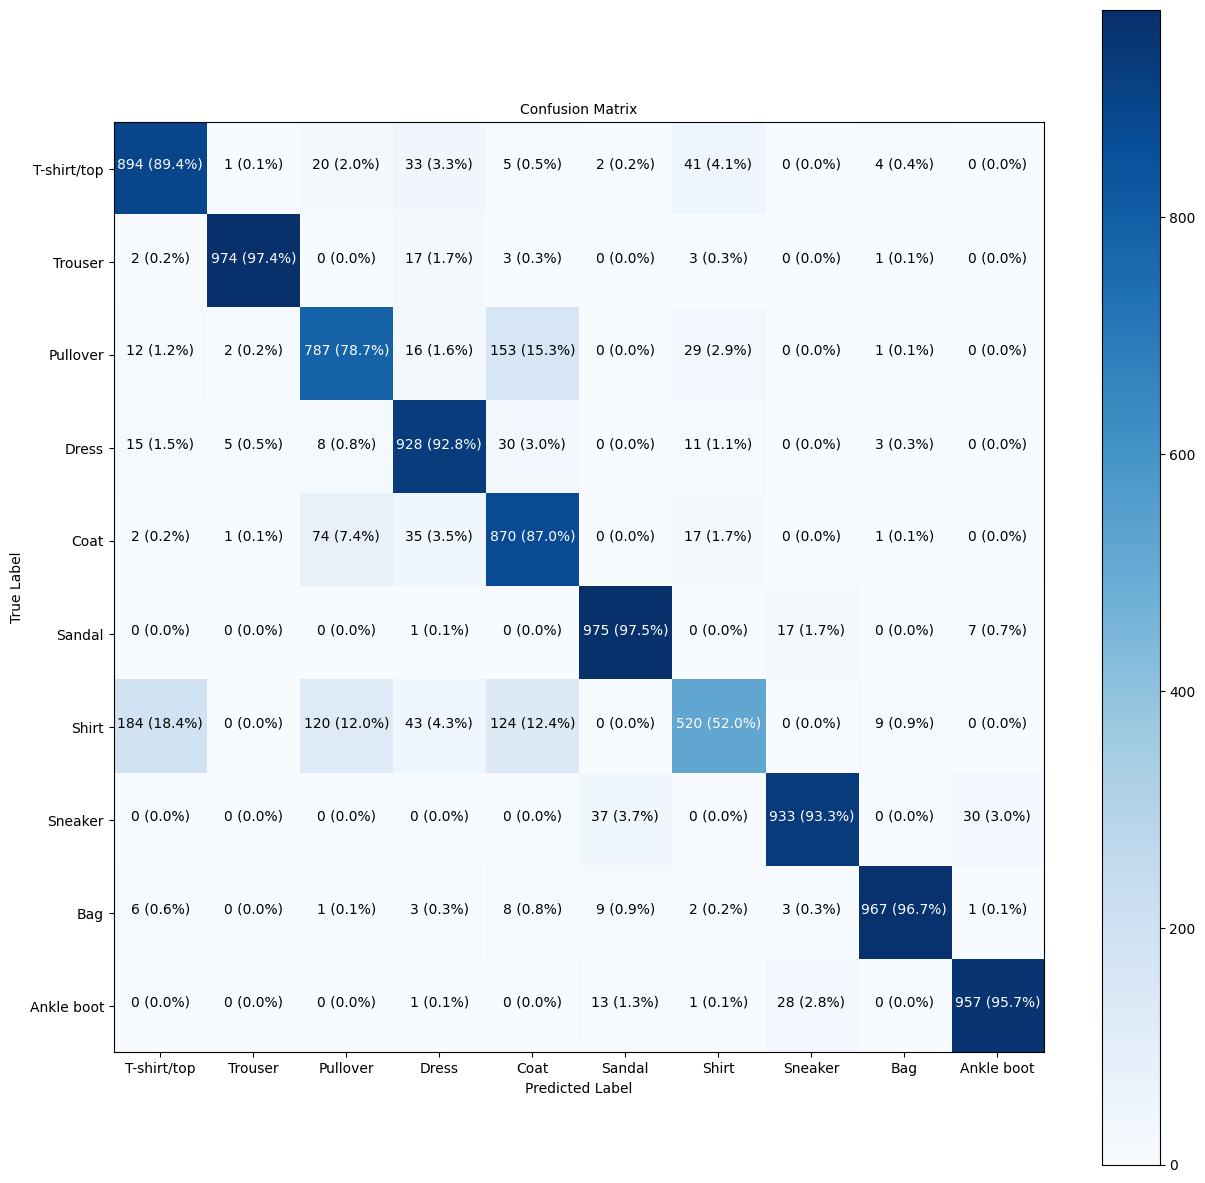

In [ ]:
plot_confusion_metrix(test_labels,y_preds, classes=class_names, figsize=(15,15), text_size=10)